In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
# 1. Chargement et Division des Données
# Charger le jeu de données cats_vs_dogs et le diviser en 70% entraînement, 15% validation et 15% test
(ds_train, ds_dev, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

# Prétraitement des images (redimensionnement et normalisation)
def preprocess_image(image, label):
    #image = tf.image.resize(image, (128, 128))  # Redimensionner les images à 128x128
    #image = tf.cast(image, tf.float32) / 255.0  # Normaliser les images entre 0 et 1
    image = tf.image.resize(image, (128, 128))  # Resize to 64x64
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to the range [0, 1]
    return image, label

# Appliquer le prétraitement sans batchs
ds_train = ds_train.map(preprocess_image)
ds_dev = ds_dev.map(preprocess_image)
ds_test = ds_test.map(preprocess_image)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.SZ54GZ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


Valeurs min et max de l'image après normalisation: 0.057610247 0.9972332


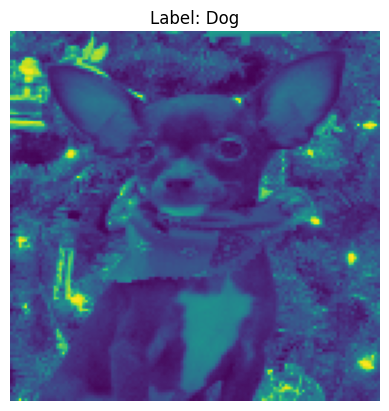

In [ ]:
import matplotlib.pyplot as plt
# Appliquer le prétraitement sur une seule image
for image, label in ds_train.take(2):  # Prendre une seule image du jeu d'entraînement
    image = image.numpy()  # Convertir en numpy pour l'affichage
    label = label.numpy()

# Vérification des valeurs minimum et maximum de l'image
print("Valeurs min et max de l'image après normalisation:", image.min(), image.max())

# Affichage de l'image
plt.imshow(image)
plt.title(f"Label: {'Dog' if label == 1 else 'Cat'}")  # Afficher le label en texte
plt.axis('off')
plt.show()

In [ ]:
# 2. Construction du Modèle
model = models.Sequential()
model.add(layers.Flatten(input_shape=(128, 128, 1)))       # Aplatir l'image
model.add(layers.Dense(128, activation='relu'))            # Première couche dense
model.add(layers.Dense(64, activation='relu'))             # Deuxième couche dense
model.add(layers.Dense(1, activation='sigmoid'))            # Sortie (1 neurone pour la classification binaire)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 3. Compilation et Entraînement
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,105,601 (8.03 MB)

 Trainable params: 2,105,601 (8.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convertir les datasets en listes pour l'entraînement
train_images, train_labels = zip(*[(image, label) for image, label in ds_train])
dev_images, dev_labels = zip(*[(image, label) for image, label in ds_dev])
test_images, test_labels = zip(*[(image, label) for image, label in ds_test])


In [ ]:
train_images = tf.stack(train_images)
train_labels = tf.stack(train_labels)
dev_images = tf.stack(dev_images)
dev_labels = tf.stack(dev_labels)
test_images = tf.stack(test_images)
test_labels = tf.stack(test_labels)

In [ ]:
# Entraîner le modèle
import time

start_time = time.time()  # Start timing

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(dev_images, dev_labels))
end_time = time.time()    # End timing

Epoch 1/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.5262 - loss: 1.0055 - val_accuracy: 0.5722 - val_loss: 0.6789
Epoch 2/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5697 - loss: 0.6830 - val_accuracy: 0.5605 - val_loss: 0.6860
Epoch 3/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.5794 - loss: 0.6763 - val_accuracy: 0.5739 - val_loss: 0.6780
Epoch 4/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.5838 - loss: 0.6737 - val_accuracy: 0.5885 - val_loss: 0.6722
Epoch 5/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6035 - loss: 0.6645 - val_accuracy: 0.5934 - val_loss: 0.6678
Epoch 6/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.5828 - loss: 0.6700 - val_accuracy: 0.5794 - val_loss: 0.6839
Epoch 7/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5938 - loss: 0.6657 - val_accuracy: 0.5920 - val_loss: 0.6677
Epoch 8/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6054 - loss: 0.6627 - 

In [ ]:
execution_time = end_time - start_time  # Calculate duration
print(f"Execution time: {execution_time} seconds")

Execution time: 926.1405212879181 seconds


In [ ]:
# 4. Évaluation Initiale
# Évaluer les performances sur le jeu de validation
val_loss, val_accuracy = model.evaluate(dev_images,dev_labels)

# 5. Affichage des performances
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5884 - loss: 0.6921
Validation Loss: 0.6891772150993347
Validation Accuracy: 0.5905444025993347


In [ ]:
#5 Évaluer les performances sur le jeu de test
test_loss, test_accuracy = model.evaluate(tf.stack(test_images), tf.stack(test_labels))
# Affichage des performances
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6090 - loss: 0.6731
Test Loss: 0.6762776970863342
Test Accuracy: 0.6099168658256531


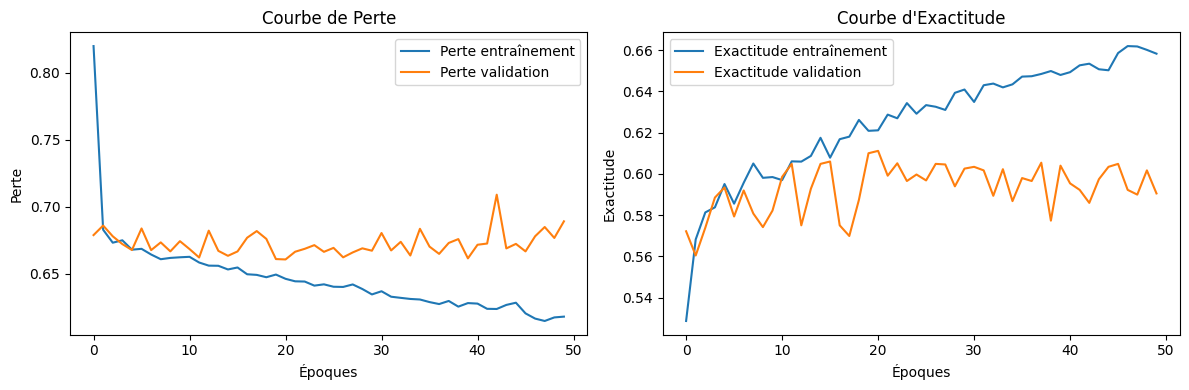

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Visualiser la perte (loss) d'entraînement et de validation
plt.figure(figsize=(12, 4))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte')

# Courbe de l'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitude entraînement')
plt.plot(history.history['val_accuracy'], label='Exactitude validation')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()
plt.title('Courbe d\'Exactitude')

plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:

# Construction du modèle
model = Sequential()

model.add( Flatten(input_shape=(128, 128, 1)))  # Aplatir l'image en un vecteur


model.add( Dense(128, activation='relu'))  # Couche dense avec 128 neurones
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.3))  # Régularisation avec Dropout

model.add(Dense(256, activation='relu'))  # Couche dense avec 256 neurones
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Régularisation avec Dropout

model.add(Dense(512, activation='relu'))  # Couche dense avec 512 neurones
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Régularisation avec Dropout
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compilation et configuration de la réduction du taux d'apprentissage
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,985 (8.64 MB)

 Trainable params: 2,264,193 (8.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:

# Réduction du taux d'apprentissage dynamique (Learning Rate Decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Entraînement du modèle avec callbacks
history = model.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(dev_images, dev_labels),
    callbacks=[reduce_lr],
    batch_size=32,
)

Epoch 1/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.5398 - loss: 0.8824 - val_accuracy: 0.5848 - val_loss: 0.6732 - learning_rate: 0.0010
Epoch 2/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.5792 - loss: 0.7005 - val_accuracy: 0.6054 - val_loss: 0.6634 - learning_rate: 0.0010
Epoch 3/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.5890 - loss: 0.6725 - val_accuracy: 0.5891 - val_loss: 0.6627 - learning_rate: 0.0010
Epoch 4/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.5986 - loss: 0.6693 - val_accuracy: 0.5819 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 5/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5984 - loss: 0.6668 - val_accuracy: 0.5928 - val_loss: 0.6624 - learning_rate: 0.0010
Epoch 6/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6027 - loss: 0.6646 - val_accuracy: 0.5951 - val_loss: 0.6711 - learning_rate: 0.0010
Epoch 7/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.6

In [ ]:
# Visualiser la perte (loss) d'entraînement et de validation
plt.figure(figsize=(12, 4))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte')

# Courbe de l'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitude entraînement')
plt.plot(history.history['val_accuracy'], label='Exactitude validation')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()
plt.title('Courbe d\'Exactitude')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Évaluation sur le jeu de test
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6221 - loss: 0.6595
Test Loss: 0.6607
Test Accuracy: 0.6240


# images couleurs

In [2]:
# 1. Chargement et Division des Données
# Charger le jeu de données cats_vs_dogs et le diviser en 70% entraînement, 15% validation et 15% test
(ds_train, ds_dev, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

# Prétraitement des images (redimensionnement et normalisation)
def preprocess_image(image, label):
    #image = tf.image.resize(image, (128, 128))  # Redimensionner les images à 128x128
    #image = tf.cast(image, tf.float32) / 255.0  # Normaliser les images entre 0 et 1
    image = tf.image.resize(image, (128, 128))  # Resize to 64x64
    #image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to the range [0, 1]
    return image, label

# Appliquer le prétraitement sans batchs
ds_train = ds_train.map(preprocess_image)
ds_dev = ds_dev.map(preprocess_image)
ds_test = ds_test.map(preprocess_image)


Valeurs min et max de l'image après normalisation: 0.0007132736 1.0


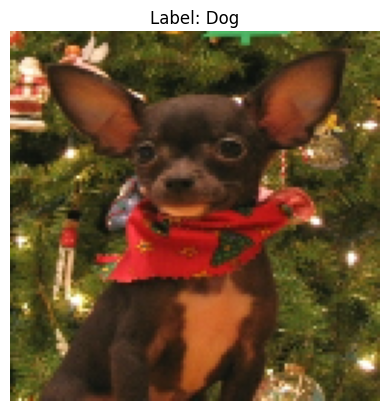

In [3]:
import matplotlib.pyplot as plt
# Appliquer le prétraitement sur une seule image
for image, label in ds_train.take(2):  # Prendre une seule image du jeu d'entraînement
    image = image.numpy()  # Convertir en numpy pour l'affichage
    label = label.numpy()

# Vérification des valeurs minimum et maximum de l'image
print("Valeurs min et max de l'image après normalisation:", image.min(), image.max())

# Affichage de l'image
plt.imshow(image)
plt.title(f"Label: {'Dog' if label == 1 else 'Cat'}")  # Afficher le label en texte
plt.axis('off')
plt.show()

In [2]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
# Construction du modèle
model = Sequential()

model.add( Flatten(input_shape=(128, 128, 3)))  # Aplatir l'image en un vecteur


model.add( Dense(128, activation='relu'))  # Couche dense avec 128 neurones
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.3))  # Régularisation avec Dropout

model.add(Dense(256, activation='relu'))  # Couche dense avec 256 neurones
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Régularisation avec Dropout

model.add(Dense(512, activation='relu'))  # Couche dense avec 512 neurones
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Régularisation avec Dropout
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compilation et configuration de la réduction du taux d'apprentissage
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,291,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,460,289 (24.64 MB)

 Trainable params: 6,458,497 (24.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [7]:
# Convertir les datasets en listes pour l'entraînement
train_images, train_labels = zip(*[(image, label) for image, label in ds_train])
dev_images, dev_labels = zip(*[(image, label) for image, label in ds_dev])
test_images, test_labels = zip(*[(image, label) for image, label in ds_test])


In [8]:
train_images = tf.stack(train_images)
train_labels = tf.stack(train_labels)
dev_images = tf.stack(dev_images)
dev_labels = tf.stack(dev_labels)
test_images = tf.stack(test_images)
test_labels = tf.stack(test_labels)

In [9]:
# Réduction du taux d'apprentissage dynamique (Learning Rate Decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Entraînement du modèle avec callbacks
history = model.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(dev_images, dev_labels),
    callbacks=[reduce_lr],
    batch_size=32,
)

Epoch 1/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5345 - loss: 0.8889 - val_accuracy: 0.5848 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 2/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5761 - loss: 0.6994 - val_accuracy: 0.6077 - val_loss: 0.6589 - learning_rate: 0.0010
Epoch 3/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6059 - loss: 0.6645 - val_accuracy: 0.5476 - val_loss: 0.7277 - learning_rate: 0.0010
Epoch 4/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6049 - loss: 0.6652 - val_accuracy: 0.6155 - val_loss: 0.6487 - learning_rate: 0.0010
Epoch 5/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6119 - loss: 0.6564 - val_accuracy: 0.6143 - val_loss: 0.6565 - learning_rate: 0.0010
Epoch 6/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6274 - loss: 0.6451 - val_accuracy: 0.6097 - val_loss: 0.6559 - learning_rate: 0.0010
Epoch 7/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6164 - loss: 0.6496

In [10]:
# Évaluation sur le jeu de test
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6560 - loss: 0.6566
Test Loss: 0.6595
Test Accuracy: 0.6569
